# Bezmerizing demo notebook

By [Allison Parrish](https://www.decontextualize.com/)

Actual copy TK.

See also [Flat and asemic writing](https://github.com/aparrish/material-of-language/blob/master/flat-asemic-writing.ipynb) for an introduction to the `Polyline` object.

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import bezmerizing
from bezmerizing import Polyline, Bezier

In [15]:
from flat import document, rgba, shape

In [16]:
import numpy as np

In [17]:
from IPython.display import SVG, Image, display

In [18]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

## Bezier objects

In [19]:
bez = Bezier(
    [25, 25], # start
    [150, 50], # control point 1
    [50, 150], # control point 2
    [175, 175] # end
)

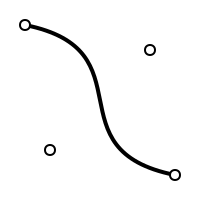

In [20]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
page.place(curve_fig.path(bez.to_path()))
page.place(point_fig.circle(*bez.start, 5))
page.place(point_fig.circle(*bez.cp1, 5))
page.place(point_fig.circle(*bez.cp2, 5))
page.place(point_fig.circle(*bez.end, 5))
show(page)

In [21]:
n_pts = 12
pts = []
for i in range(n_pts + 1):
    pts.append(bez.point(i/n_pts))

In [22]:
pts

[[25.0, 25.0],
 [51.822916666666664, 32.725694444444436],
 [70.83333333333334, 43.05555555555556],
 [83.59375, 55.46875],
 [91.66666666666667, 69.44444444444444],
 [96.6145833333333, 84.46180555555554],
 [100.0, 100.0],
 [103.38541666666667, 115.53819444444447],
 [108.33333333333331, 130.55555555555554],
 [116.40625, 144.53125],
 [129.16666666666669, 156.94444444444446],
 [148.17708333333331, 167.27430555555554],
 [175.0, 175.0]]

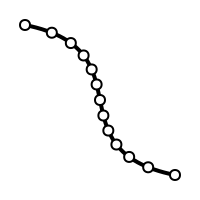

In [23]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
page.place(curve_fig.path(bez.to_path()))
for pt in pts:
    page.place(point_fig.circle(*pt, 5))
show(page)

## Curve offsets

In [24]:
offset_p = bez.offsets(np.linspace(4, 16, 12))

In [25]:
offset_p

Polyline([[24.2155, 28.9223], [51.8557, 38.2488], [69.6672, 49.9649], [80.1047, 63.1229], [85.8499, 77.5715], [89.0117, 93.4870], [91.4390, 110.7346], [95.2698, 129.0268], [103.1481, 147.8101], [117.6981, 165.5388], [140.3077, 180.1519], [171.8621, 190.6893]])

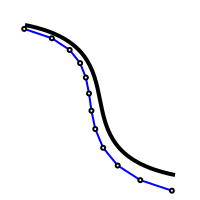

In [26]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
offset_fig = shape().stroke(rgba(0, 0, 255, 255)).nofill().width(2)
page.place(curve_fig.path(bez.to_path()))
page.place(offset_fig.polyline(offset_p))
for pt in offset_p.vertices:
    page.place(point_fig.circle(*pt, 2))
show(page)

In [27]:
poly = bez.offset_polygon(np.linspace(8, 16, 20))

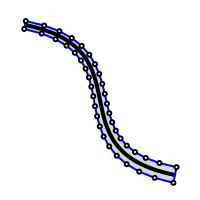

In [28]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(4)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(2)
offset_fig = shape().stroke(rgba(0, 0, 255, 255)).fill(rgba(0, 0, 0, 40)).width(2)
page.place(curve_fig.path(bez.to_path()))
page.place(offset_fig.polygon(poly))
for pt in poly.vertices:
    page.place(point_fig.circle(*pt, 2))
show(page)

## Curves from points

In [35]:
random_p = Polyline([[np.random.normal(100, 50), np.random.normal(100, 50)] for i in range(12)])

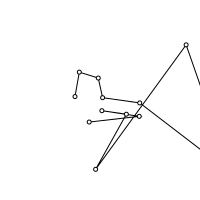

In [36]:
d = document(200, 200, 'pt')
page = d.addpage()
line_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(1)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(1)
page.place(line_fig.polyline(random_p))
for pt in random_p.vertices:
    page.place(point_fig.circle(*pt, 2))
show(page)

In [37]:
spline = random_p.catmull_spline(tightness=0.1)

In [38]:
len(spline.beziers)

9

In [39]:
path = spline.to_path()

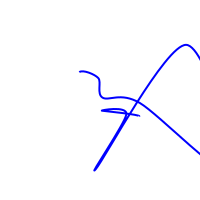

In [40]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 255, 255)).nofill().width(2)
page.place(curve_fig.path(path))
show(page)

In [41]:
path = random_p.augment().smooth_path(tightness=0.1)

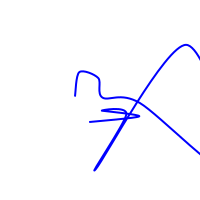

In [42]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().stroke(rgba(0, 0, 255, 255)).nofill().width(2)
page.place(curve_fig.path(path))
show(page)

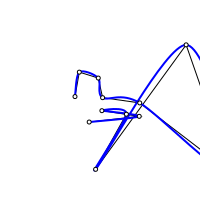

In [43]:
d = document(200, 200, 'pt')
page = d.addpage()
line_fig = shape().stroke(rgba(0, 0, 0, 255)).nofill().width(1)
curve_fig = shape().stroke(rgba(0, 0, 255, 255)).nofill().width(2)
point_fig = shape().stroke(rgba(0, 0, 0, 255)).fill(rgba(255, 255, 255, 255)).width(1)
page.place(line_fig.polyline(random_p))
page.place(curve_fig.path(path))
for pt in random_p.vertices:
    page.place(point_fig.circle(*pt, 2))
show(page)

## Offsets of splines

In [45]:
polyline = spline.tangent_offsets(
    distances=np.sin(np.linspace(0, np.pi*50, 500))*6,
    samples_per=48
)
curve_path = spline.to_path()

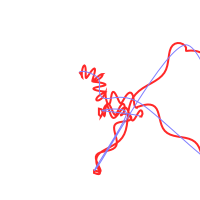

In [46]:
d = document(200, 200, 'pt')
page = d.addpage()
polyline_fig = shape().stroke(rgba(255, 40, 40, 255)).width(2)
curve_fig = shape().stroke(rgba(128, 128, 255, 255))
page.place(polyline_fig.polyline(polyline))
page.place(curve_fig.path(curve_path))
show(page)

In [47]:
poly = spline.tangent_offset_polygon(
    thicknesses=[2, 8, 2],
    samples_per=12)

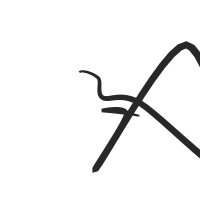

In [48]:
d = document(200, 200, 'pt')
page = d.addpage()
curve_fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
page.place(curve_fig.polygon(poly))
show(page)

## Putting everything together

In [49]:
pts = [[np.random.normal(300, 100), np.random.normal(300, 100)] for i in range(24)]

In [50]:
thicknesses = (np.sin(np.linspace(0, np.pi*4, 100))+1) * 8

In [51]:
poly = Polyline(pts).fancy_curve(thicknesses=thicknesses, samples_per=24)

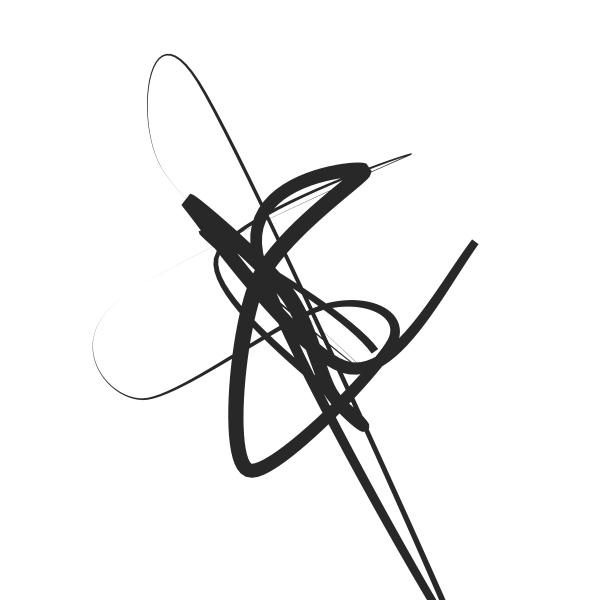

In [52]:
d = document(600, 600, 'pt')
page = d.addpage()
curve_fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
page.place(curve_fig.polygon(poly))
show(page)

## Path class

In [53]:
from bezmerizing import Path
from flat import command

In [54]:
p = Path([
    command.moveto(10, 10),
    command.lineto(15, 25),
    command.curveto(15, 30, 5, 30, 5, 25),
    command.closepath
])

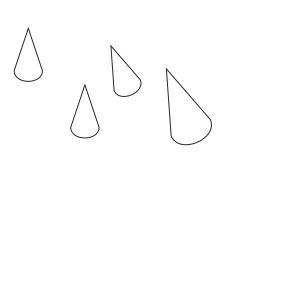

In [55]:
d = document(100, 100, 'mm')
page = d.addpage()
fig = shape().stroke(rgba(40, 40, 40, 255)).nofill()
page.place(fig.path(p))
page.place(fig.path(p.translate(20, 20)))
page.place(fig.path(p.translate(20, 20).rotate(np.pi*0.125)))
page.place(fig.path(p.translate(20, 20).rotate(np.pi*0.125).scale(1.5)))
show(page)

In [57]:
p

Path([moveto(x=10.0000, y=10.0000), lineto(x=15.0000, y=25.0000), curveto(x1=15.0000, y1=30.0000, x2=5.0000, y2=30.0000, x=5.0000, y=25.0000), closepath])

In [58]:
pts = [[np.random.normal(), np.random.normal()] for i in range(24)]
thicknesses = (np.sin(np.linspace(0, np.pi*4, 100))+1) * 0.1
poly = Polyline(pts).fancy_curve(thicknesses=thicknesses, samples_per=24)

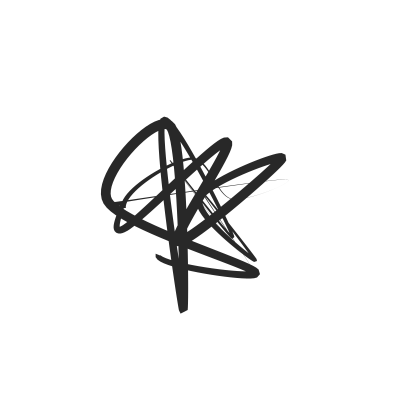

In [59]:
d = document(400, 400, 'pt')
page = d.addpage()
curve_fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
page.place(curve_fig.polygon(poly.scale(50).translate(200, 200)))
show(page)

## Polyline primitives

In [61]:
from bezmerizing.primitives import arc, ellipse, circle, rect

In [62]:
print(arc(0, 0, 100, 150, 0, (3/2)*np.pi).translate(50, 50))

Polyline([[150.0000, 50.0000], [149.7290, 61.0347], [148.9177, 72.0096], [147.5702, 82.8652], [145.6940, 93.5427], [143.2993, 103.9843], [140.3989, 114.1333], [137.0087, 123.9347], [133.1470, 133.3355], [128.8346, 142.2847], [124.0951, 150.7338], [118.9541, 158.6371], [113.4393, 165.9516], [107.5808, 172.6377], [101.4103, 178.6593], [94.9611, 183.9836], [88.2683, 188.5819], [81.3682, 192.4292], [74.2980, 195.5047], [67.0962, 197.7916], [59.8017, 199.2777], [52.4541, 199.9548], [45.0932, 199.8193], [37.7589, 198.8719], [30.4910, 197.1178], [23.3287, 194.5664], [16.3110, 191.2316], [9.4759, 187.1315], [2.8603, 182.2882], [-3.4998, 176.7280], [-9.5699, 170.4811], [-15.3173, 163.5813], [-20.7107, 156.0660], [-25.7209, 147.9759], [-30.3208, 139.3549], [-34.4854, 130.2496], [-38.1921, 120.7095], [-41.4210, 110.7862], [-44.1544, 100.5335], [-46.3776, 90.0069], [-48.0785, 79.2635], [-49.2480, 68.3616], [-49.8795, 57.3602], [-49.9699, 46.3188], [-49.5185, 35.2974], [-48.5278, 24.3557], [-47.003

In [63]:
a = arc(0, 0, 40, 60, 0, (3/2)*np.pi)
b = ellipse(0, 0, 60, 40)
c = circle(0, 0, 75)
d = rect(-40, -25, 80, 50)

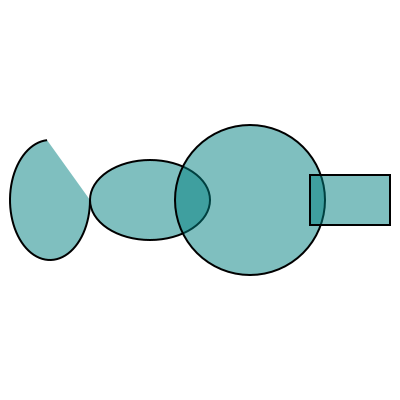

In [64]:
doc = document(400, 400, 'pt')
page = doc.addpage()
curve_fig = shape().fill(rgba(0, 128, 128, 128)).stroke(rgba(0, 0, 0, 255)).width(2)
page.place(curve_fig.polyline(a.translate(50, 200)))
page.place(curve_fig.polygon(b.translate(150, 200)))
page.place(curve_fig.polygon(c.translate(250, 200)))
page.place(curve_fig.polygon(d.translate(350, 200)))
show(page)

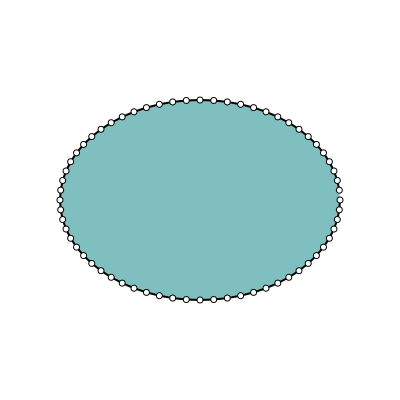

In [65]:
b = ellipse(200, 200, 140, 100)
doc = document(400, 400, 'pt')
page = doc.addpage()
curve_fig = shape().fill(rgba(0, 128, 128, 128)).stroke(rgba(0, 0, 0, 255)).width(2)
point_fig = shape().fill(rgba(255, 255, 255, 255)).stroke(rgba(0, 0, 0, 255)).width(1)
page.place(curve_fig.polyline(b))
for pt in b.vertices:
    page.place(point_fig.circle(*pt, 3))
show(page)

In [66]:
b = ellipse(200, 200, 140, 100, n=5)

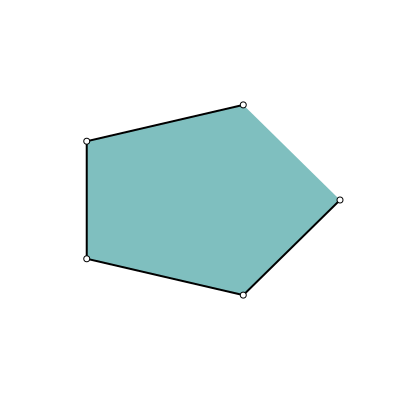

In [67]:
doc = document(400, 400, 'pt')
page = doc.addpage()
curve_fig = shape().fill(rgba(0, 128, 128, 128)).stroke(rgba(0, 0, 0, 255)).width(2)
point_fig = shape().fill(rgba(255, 255, 255, 255)).stroke(rgba(0, 0, 0, 255)).width(1)
page.place(curve_fig.polyline(b))
for pt in b.vertices:
    page.place(point_fig.circle(*pt, 3))
show(page)

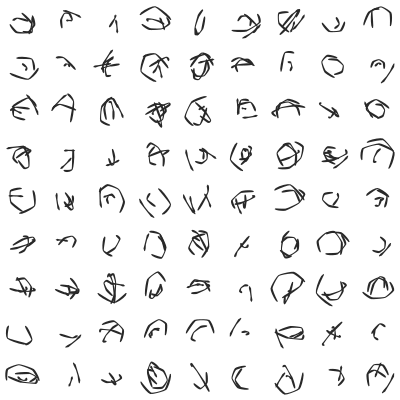

In [68]:
doc = document(400, 400, 'pt')
page = doc.addpage()
fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
grid_size = 9
grid_res = doc.width / grid_size
for i in range(grid_size):
    for j in range(grid_size):
        for k in range(np.random.choice([2, 3, 4, 5])):
            poly = ellipse(0, 0,
                           np.random.uniform((doc.width/grid_size)*0.4),
                           np.random.uniform((doc.height/grid_size)*0.4),
                           n=np.random.choice([4, 5, 6, 7]))
            poly_fancy = poly.fancy_curve(thicknesses=[1, 2, 1, 2, 1],
                                          interp="cubic",
                                          tightness=0.5)
            page.place(fig.polygon(poly_fancy.rotate(np.random.uniform(np.pi*2)).translate(
                i*grid_res+grid_res*0.5, j*grid_res+grid_res*0.5)))
show(page)

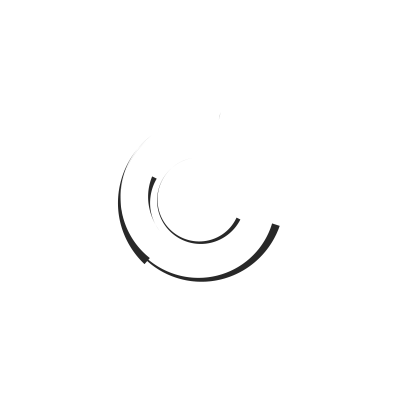

In [69]:
parts = []
for i in range(5):
    arc_poly = arc(0, 0, 100, 100, np.random.uniform(0, np.pi*2), np.random.uniform(0, np.pi*2))
    poly = arc_poly.fancy_curve(thicknesses=[10, 5, 1, 0], interp="quadratic")
    poly = poly.scale(np.random.uniform(0.25, 1.5))
    parts.append(poly)
d = document(400, 400, 'pt')
page = d.addpage()
curve_fig = shape().fill(rgba(40, 40, 40, 255)).nostroke()
for part in parts:
    page.place(curve_fig.polygon(part.translate(200, 200)))
show(page)